In [1]:
import os

import numpy as np
import torch
import torch.nn.functional as F

from PIL import Image

from unet import UNet

from torchvision import transforms

import matplotlib.pylab as plt

from utils import merge_masks, dense_crf
from utils import plot_img_and_mask

In [2]:
def normalize(x):
    return np.float32(x/255.)

In [3]:
def hwc_to_chw(img):
    return np.transpose(img, axes=[2, 0, 1])

In [4]:
net = UNet(n_channels=3, n_classes=1)

In [5]:
net.cpu()

UNet(
  (inc): inconv(
    (conv): double_conv(
      (conv): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace)
      )
    )
  )
  (down1): down(
    (mpconv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): double_conv(
        (conv): Sequential(
          (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace)
          (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (4): BatchNorm2d(128, eps=1e-0

In [6]:
net.load_state_dict(torch.load("checkpoints/CP55.pth", map_location='cpu'))

In [7]:
fn = "/home/kenny/Desktop/lanes-segmentation/data/images/um/um_000000.png"

In [8]:
full_img = Image.open(fn)
out_threshold = 0.5
use_dense_crf = False
use_gpu = False

In [9]:
net.eval()
img_height = 1152
img_width = 320

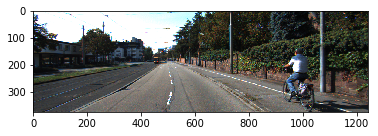

In [10]:
plt.imshow(full_img)

In [11]:
img = np.array(full_img)
img = img[:320,:1152]
img = hwc_to_chw(img)
img = normalize(img)

In [12]:
img.dtype

dtype('float32')

In [44]:
X = torch.from_numpy(img).unsqueeze(0)

In [56]:
with torch.no_grad():
    
    output = net(X)

#     probs = output.squeeze(0)

#     tf = transforms.Compose(
#         [
#             transforms.ToPILImage(),
#             transforms.Resize(img_height),
#             transforms.ToTensor()
#         ]
#     )

#     probs = output.cpu()

#     mask_np = probs.squeeze().cpu().numpy()
    
    mask_np = output.squeeze().cpu().numpy()

In [57]:
mask_np.dtype

dtype('float32')

In [58]:
mask = mask_np > out_threshold

In [59]:
mask.shape

(320, 1152)

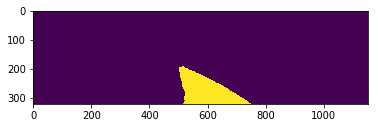

In [60]:
plt.imshow(mask)

In [29]:
gt = "/home/kenny/Desktop/lanes-segmentation/data/labels/egolane/um/um_000000.png"

In [30]:
full_lbl = Image.open(gt)

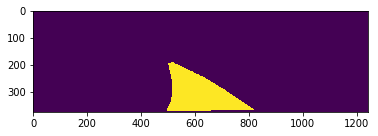

In [31]:
plt.imshow(np.array(full_lbl))